<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 03: Julia lab - constrained optimization </font></p>
</p></br>
</p>
</CENTER>

---------------------------

# <span style="color:#00B8DE">Constrained optimization</span>


Let us consider the following optimization problems

$$
(I) \left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
3x+y\ = 1
\end{array}
\right.
$$

and

$$
(II)\left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
(x+1)^2+(y-3)^2 \leq 1
\end{array}
\right.
$$

**1)** Plot the objective function and the constraints for both problems. 

**2)** Solve (I) with a Newton linearly constrained approach

**3)** Solve (II) with an interior point approach.


## <span style="color:#00B8DE">I - Objective and constraints plot

In [ ]:
using Pkg
Pkg.add("Plots")

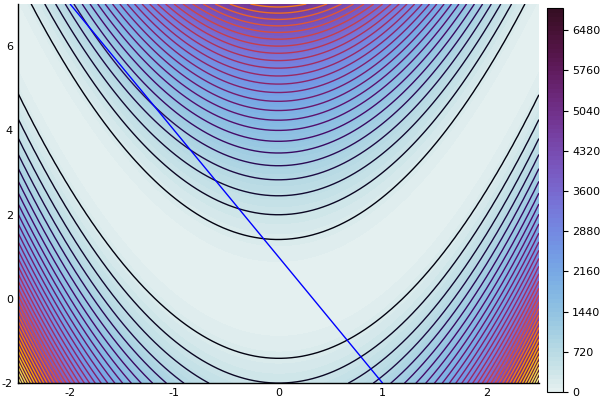

In [76]:
using Plots
pyplot()

f(x,y) = (1-x)^2 + 100 * (y-x^2)^2
h1(x,y) = 3*x+y-1

n = 100
x = range(-2.5,stop=2.5,length=n)
y = range(-2,stop=7,length=n)

X = repeat(x',n,1)
Y = repeat(y,1,n)
Z = f.(X,Y)
H1 = h1.(X,Y)

#imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.Spectral,extent=(-3,3,-3,3))
#contour(Z,linewidths=1.5,colors='k',extent=(-3,3,-3,3))#origin='lower',
#contour(X,Y,Z)
fig = contourf(X,Y,Z, nlevels = 100, c=:dense,label="")
contour!(X,Y,Z,nlevels = 40,label="")
contour!(X,Y,H1,nlevels = 0,label="",color = :blue)

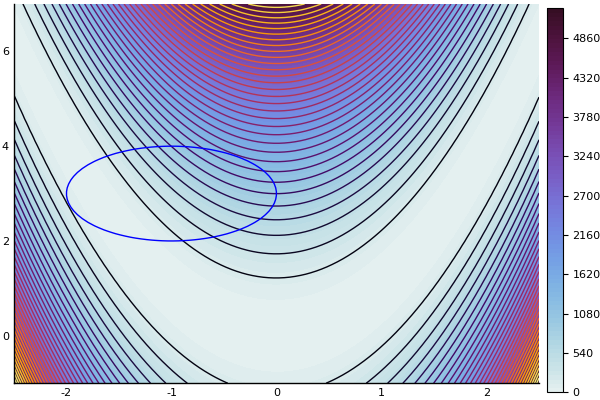

In [39]:
using Plots
pyplot()

f(x,y) = (1-x)^2 + 100 * (y-x^2)^2
h2(x,y) = (x+1)^2+(y-3)^2-1

n = 100
x = range(-2.5,stop=2.5,length=n)
y = range(-1,stop=7,length=n)

X = repeat(x',n,1)
Y = repeat(y,1,n)
Z = f.(X,Y)
H2 = h2.(X,Y)

#imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.Spectral,extent=(-3,3,-3,3))
#contour(Z,linewidths=1.5,colors='k',extent=(-3,3,-3,3))#origin='lower',
#contour(X,Y,Z)
fig = contourf(X,Y,Z, nlevels = 100, c=:dense,label="")
contour!(X,Y,Z,nlevels = 40,label="")
contour!(X,Y,H2,nlevels = 0,label="",color = :blue)

## <span style="color:#00B8DE">II - Linearly constrained Newton

In [44]:
f(x,y)   = (1-x)^2 + 100 * (y-x^2)^2
∇f(x,y)  = [-2*(1-x)-400*(y-x^2)*x; 200*(y-x^2)]
∇2f(x,y) = [2-400*(y-x^2)+800*x^2 -400*x; -400*x 200]

h(x,y)  = 3*x+y-1
∇h      = [3 1]

1×2 Array{Int64,2}:
 3  1

In [45]:
# Backtracking
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    α,β = 0.25, 0.7 # backtracking parameters 0.7
    
    t = 1;
    n = 0;
    
    while f(x[1]+t*d[1],x[2]+t*d[2])>f(x[1],x[2])+α*t*transpose(∇f(x[1],x[2]))*d
        t = β*t;
        n = n+1;
    end
    
    return t,n
end

backtracking (generic function with 1 method)

In [91]:
using LinearAlgebra: inv

prec        = 1.e-12
init        = [1,5]
pt          = init
nb_iter_N   = 0  # number of loops
nb_loops_N  = 0  # number of inner loops count for backtracking
resu_N      = pt
A = [3 1]
b = 1

while true
        
    M = [∇2f(pt[1],pt[2]) [A[1]; A[2]];[A[1] A[2] 0]]
    
    c = [-∇f(pt[1],pt[2]); b.-A*pt]
    
    sol = inv(M)*c
    
    d = sol[1:2]
    
    t,n = backtracking(pt,f,∇f,d)
    
    pt = pt + t*d;
    
    resu_N      = [resu_N pt]
    
    ∇= ∇f(pt[1],pt[2])
    
    nb_loops_N += n
    
    nb_iter_N += 1    
    
    if (-∇'*d)/2 < prec  # ∇f(x+td)_{t=0}'*d= ∇'*d
        break
    end
    
end

In [92]:
println("Number of iterations for constrained Newton = $nb_iter_N")
println("Number of inner loops for constrained Newton = $nb_loops_N")

Number of iterations for constrained Newton = 2
Number of inner loops for constrained Newton = 0


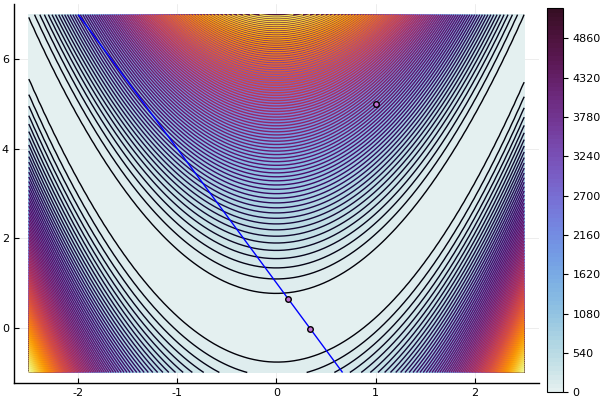

In [93]:
using Plots
pyplot()

f(x,y) = (1-x)^2 + 100 * (y-x^2)^2
h1(x,y) = 3*x+y-1

n = 100
x = range(-2.5,stop=2.5,length=n)
y = range(-1,stop=7,length=n)

X = repeat(x',n,1)
Y = repeat(y,1,n)
Z = f.(X,Y)
H1 = h1.(X,Y)

#imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.Spectral,extent=(-3,3,-3,3))
#contour(Z,linewidths=1.5,colors='k',extent=(-3,3,-3,3))#origin='lower',
#contour(X,Y,Z)

Xresult = repeat(resu_N[1,:]',n,1)
Yresult = repeat(resu_N[2,:],1,n)


fig = contourf(X,Y,Z, nlevels = 100, c=:dense,label="")
contour!(X,Y,Z,nlevels = 100,label="")
contour!(X,Y,H1,nlevels = 0,label="",color = :blue)
scatter!([resu_N[1,:]], [resu_N[2,:]],label="")

## <span style="color:#00B8DE">III - Interior point method

In [4]:
using LinearAlgebra: norm, eigen

prec        = 1.e-12
init        = [-1,3]  # center of the circle
pt          = init
nb_iter_IP  = 0  # number of loops
nb_loops_IP = 0  # number of inner loops count for backtracking
resu_IP     = pt
t=10
alpha = 1.5
m=1
ν =10

h2(x,y) = (x+1)^2+(y-3)^2-1
∇h2(x,y)=[2*(x+1); 2*(y-3)]
phi(x,y) = -log(-h2(x,y))
∇phi(x,y) = -∇h2(x,y)/h2(x,y)

F(x,y) = t*f(x,y)+phi(x,y)
∇F(x,y) = t*∇f(x,y)+∇phi(x,y)

while true
    
    nb_iter_IP  += 1;
    
    for k=1:ν # inner loop
    
        d = -∇F(pt[1],pt[2])
        
        while norm(pt+d-init)>1
            d *=0.5
        end
        
        rho,n = backtracking(pt,F,∇F,d);

        pt = pt + rho*d
      
        resu_IP = [resu_IP pt];
        nb_loops_IP += n
    
    end

    t = alpha*t
    
    if (m/t)<prec
        break
    end
end


In [5]:
println("Number of iterations for Interior point = $nb_iter_IP")
println("Number of inner loops for  Interior point = $nb_loops_IP")

Number of iterations for Interior point = 63
Number of inner loops for  Interior point = 13203


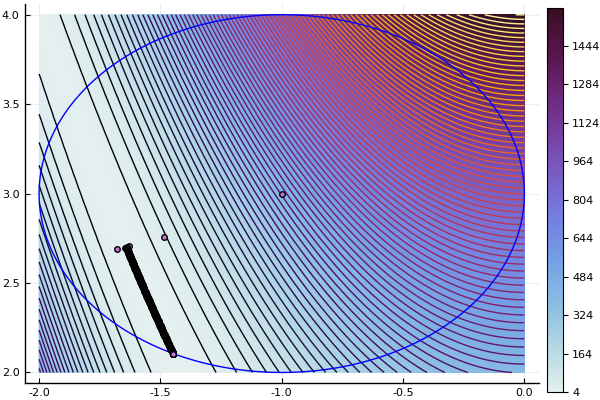

In [89]:
using Plots
pyplot()

f(x,y) = (1-x)^2 + 100 * (y-x^2)^2
h2(x,y) = (x+1)^2+(y-3)^2-1

n = 100
x = range(-2,stop=0,length=n)
y = range(2,stop=4,length=n)

X = repeat(x',n,1)
Y = repeat(y,1,n)
Z = f.(X,Y)
H2 = h2.(X,Y)

#imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.Spectral,extent=(-3,3,-3,3))
#contour(Z,linewidths=1.5,colors='k',extent=(-3,3,-3,3))#origin='lower',
#contour(X,Y,Z)
fig = contourf(X,Y,Z, nlevels = 1000, c=:dense,label="")
contour!(X,Y,Z,nlevels = 100,label="")
contour!(X,Y,H2,nlevels = 0,label="",color = :blue)
scatter!([resu_IP[1,:]], [resu_IP[2,:]],label="")